<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_Final_AP_Aut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)


Cargamos dataset

In [392]:
df=pd.read_excel('HISTORICO_SUERTES.xlsx')

Tamaño dataset

In [393]:
df.shape

(21027, 85)

primeras filas

In [394]:
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Últimas filas

In [395]:
df.tail()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9
21026,202407,80124,SANTA LUCIA,IP02,11.0,001,CORINTIAS,2.22,1.1,CC05-430,...,78.687,17.8,30.890,NaN,459.274,444.372,119.8,1041.6,532.5,1881.2


In [ ]:
df = df[(df["Período"] >= 202202)]

Descripción general de columnas

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

Descripción detallada de columnas del dataset

In [397]:
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


Revisamos Nulos

In [398]:
df.isnull().sum()

,0
Período,0
Hacienda,0
Nombre,0
Zona,0
Tenencia,1
...,...
Radiacion Solar Ciclo,16497
Precipitacion 0_3,16497
Precipitacion Ciclo,16497
Evaporacion 0-3,16497


% Part. nullos

In [399]:
df.isnull().mean()*100

,0
Período,0.000000
Hacienda,0.000000
Nombre,0.000000
Zona,0.000000
Tenencia,0.004756
...,...
Radiacion Solar Ciclo,78.456271
Precipitacion 0_3,78.456271
Precipitacion Ciclo,78.456271
Evaporacion 0-3,78.456271


Revisar duplicados

In [400]:
df.duplicated().sum()

np.int64(0)

Conteo columba categórica

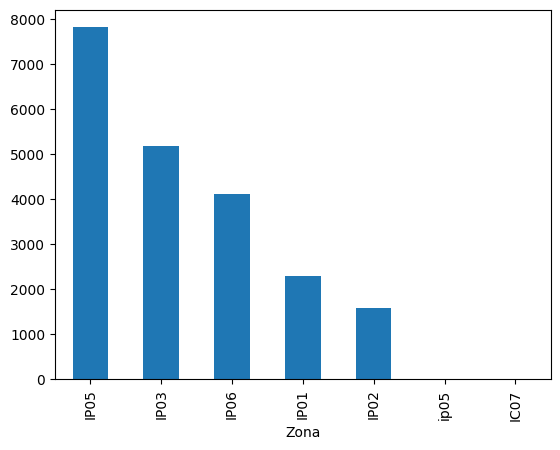

In [401]:
## para categórica

df['Zona'].value_counts().plot(kind='bar')
plt.show()

Ver qué columnas son categóricas

In [402]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']


Sacamos una base solo con categóricas

In [403]:
df_Cat=df[['TCH', 'Zona','Cultivo', 'Tipo Quema']]
df_Cat.head()

,TCH,Zona,Cultivo,Tipo Quema
0,121.198333,IP02,Normal,VERDE
1,93.793103,IP05,Normal,Q.ACCIDENTAL
2,174.347087,IP05,Normal,VERDE
3,136.790476,IP05,Normal,Q.ACCIDENTAL
4,113.068432,IP06,Normal,Q.ACCIDENTAL


In [404]:
import numpy as np
import pandas as pd

def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
                      for c in np.unique(cats)])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

# Ejemplo: TCH (continua) vs Ciudad (categórica)
eta = correlation_ratio(df_Cat["Zona"], df_Cat["TCH"])
print("Correlation ratio (eta):", eta)

Correlation ratio (eta): 0.17900633177551592


In [405]:
import numpy as np
import pandas as pd
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "TCH"

# Seleccionar categóricas (object o category) que están presentes en df_Cat
cat_cols = df_Cat.select_dtypes(include=["object", "category"]).columns.tolist()


# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df_Cat[col], df_Cat[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient="index", columns=["Cramers_V"])
cramer_df = cramer_df.sort_values(by="Cramers_V", ascending=False)

print(cramer_df)

            Cramers_V
Cultivo      0.050160
Zona         0.046707
Tipo Quema   0.000000


In [406]:
# Función correlation ratio (η)
def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([
        len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
        for c in np.unique(cats)
    ])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

# Variable continua
target = "TCH"

# Seleccionar categóricas (object / category)
cat_cols = df_Cat.select_dtypes(include=["object", "category"]).columns.tolist()
print("Variables categóricas detectadas:", cat_cols)

# Guardar resultados
eta_results = {}
for col in cat_cols:
    eta_results[col] = correlation_ratio(df_Cat[col], df_Cat[target])

# DataFrame ordenado
eta_df = pd.DataFrame.from_dict(eta_results, orient="index", columns=["eta"])
eta_df = eta_df.sort_values(by="eta", ascending=False)

print(eta_df)

Variables categóricas detectadas: ['Zona', 'Cultivo', 'Tipo Quema']
                 eta
Zona        0.179006
Tipo Quema  0.170770
Cultivo     0.005952


In [407]:
cat_vars=["Zona","Cultivo","Tipo Quema"]

df_encoded = pd.get_dummies(df_Cat, columns=cat_vars, drop_first=True)
df_encoded.head()

,TCH,Zona_IP01,Zona_IP02,Zona_IP03,Zona_IP05,Zona_IP06,Zona_ip05,Cultivo_Organico,Tipo Quema_Q.ACCIDENTAL,Tipo Quema_Q.PROGRAMADA,Tipo Quema_SEMILLA,Tipo Quema_VERDE
0,121.198333,False,True,False,False,False,False,False,False,False,False,True
1,93.793103,False,False,False,True,False,False,False,True,False,False,False
2,174.347087,False,False,False,True,False,False,False,False,False,False,True
3,136.790476,False,False,False,True,False,False,False,True,False,False,False
4,113.068432,False,False,False,False,True,False,False,True,False,False,False


Vamos a revisar significancia de categóricas

In [408]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "TCH"

# Seleccionar categóricas (object o category)
cat_cols = df_encoded.select_dtypes(include=['object','category']).columns

# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df[col], df[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Cramers_V'])
cramer_df = cramer_df.sort_values(by='Cramers_V', ascending=False)

print(cramer_df)

Empty DataFrame
Columns: [Cramers_V]
Index: []


Separar columnas númericas para correr correlaciones

In [409]:
df_numericas = df.select_dtypes(include=[np.number])
df_numericas.head()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,51.0,6.00,4.3,5,12.81,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,81.0,1.45,NaN,5,11.14,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,31.0,8.24,23.0,4,12.32,0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,82.0,1.05,66.5,2,9.79,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,31.0,4.53,17.0,3,11.53,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
df_num=df_numericas

Correlaciones

In [411]:
### Ver si lo quitamos

corr=df_numericas.corr().sort_values('TCH', ascending=False)
print (corr)

                            Período  Hacienda  Tenencia  Area Neta   Dist Km  \
TCH                       -0.122134 -0.051714 -0.021055   0.093021 -0.048510   
TAH                       -0.148777 -0.011808  0.024973   0.140966 -0.013920   
TCHM                      -0.054296 -0.072896 -0.069913   0.087121 -0.079327   
KATRHM                    -0.096214 -0.054111 -0.040488   0.121152 -0.056160   
TAHM                      -0.093161 -0.020695  0.004759   0.151875 -0.030986   
...                             ...       ...       ...        ...       ...   
%ATR                      -0.099064  0.038233  0.053667   0.067557  0.043439   
%Sac.Caña                 -0.120753  0.050982  0.038158   0.113064  0.048021   
Cod.Estado #              -0.000865  0.065617  0.193415   0.035206 -0.007177   
Fert.Nitrogen.                  NaN       NaN       NaN        NaN       NaN   
Sum Oscilacion Temp Ciclo       NaN       NaN       NaN        NaN       NaN   

                           Cod.Estado #

In [412]:
## ver si lo quitamos

# Aplanar matriz y ordenar
corr_ord = corr.unstack().sort_values(ascending=False)

# Quitar la diagonal (correlación = 1.0) y duplicados
corr_filtrada = corr_ord[corr_ord < 1].drop_duplicates()

# Mostrar las 20 más fuertes
print(corr_filtrada.head(20))

Ton.Azucar            TonUltCorte              0.987930
Brix                  Pureza                   0.978632
%Sac.Caña             Rdto                     0.970430
Evaporacion Ciclo     Edad.Precosecha          0.968729
%Sac.Muestreadora     Brix                     0.957215
Area Neta             TonUltCorte              0.948529
Ton.Azucar            Area Neta                0.947346
TAHM                  KATRHM                   0.942482
TCHM                  KATRHM                   0.898913
TAH                   TAHM                     0.881677
                      TCH                      0.866165
Rdto                  %Sac.Muestreadora        0.857887
Luvias 9 -FC          Lluvias Ciclo            0.851217
Lluvias seis a nueve  Lluvias Ciclo            0.847246
Pureza                %Sac.Muestreadora        0.831700
Evaporacion Ciclo     Edad Ult Cos             0.830807
TCHM                  TCH                      0.829980
Lluvias tres a seis   Lluvias Ciclo            0

In [413]:
# Calcular correlaciones con churn y ordenarlas
df_numericas = df.corr(numeric_only=True)['TCH'].sort_values(ascending=False)

# Mostrar resultado
print(df_numericas)

TCH                          1.000000
TAH                          0.866165
TCHM                         0.829980
KATRHM                       0.767925
TAHM                         0.737953
                               ...   
%ATR                        -0.138399
%Sac.Caña                   -0.168060
Cod.Estado #                -0.225865
Fert.Nitrogen.                    NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, Length: 67, dtype: float64


In [414]:
corr_df = df_numericas.reset_index()
corr_df.columns = ['Variable', 'Correlacion_con_TCH']
corr_df

,Variable,Correlacion_con_TCH
0,TCH,1.000000
1,TAH,0.866165
2,TCHM,0.829980
3,KATRHM,0.767925
4,TAHM,0.737953
...,...,...
62,%ATR,-0.138399
63,%Sac.Caña,-0.168060
64,Cod.Estado #,-0.225865
65,Fert.Nitrogen.,NaN


In [415]:
print(df_numericas.head(20))

TCH                      1.000000
TAH                      0.866165
TCHM                     0.829980
KATRHM                   0.767925
TAHM                     0.737953
TonUltCorte              0.320696
Edad Ult Cos             0.298166
Ton.Azucar               0.295671
Evaporacion Ciclo        0.260934
Evaporacion 0-3          0.185401
Edad.Precosecha          0.168624
Radicion Solar 0-3       0.164893
Luvias 9 -FC             0.156767
Radiacion Solar Ciclo    0.113209
%Infest.Diatrea          0.102551
DDUlt.Riego              0.093181
Area Neta                0.093021
M3 Riego                 0.084436
Lluvias Ciclo            0.084137
MEZ                      0.078172
Name: TCH, dtype: float64


In [416]:
df_num

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,51.0,6.00,4.3,5,12.81,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,81.0,1.45,NaN,5,11.14,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,31.0,8.24,23.0,4,12.32,0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,82.0,1.05,66.5,2,9.79,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,31.0,4.53,17.0,3,11.53,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,11.0,3.00,1.8,5,11.63,0,2.0,0.0,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,11.0,1.22,1.8,1,11.89,0,2.0,0.0,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,11.0,1.85,1.8,3,11.89,0,2.0,0.0,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,11.0,31.42,3.5,3,11.70,0,2.0,0.0,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


In [417]:
variables = ['TCH', 'TAH', 'KATRHM',  'Edad Ult Cos', 'TonUltCorte','Ton.Azucar']

# Conteo de no nulos y nulos por periodo
conteo = (
    df.groupby('Período')[variables]
      .agg([lambda x: x.notna().sum(), lambda x: x.isna().sum()])
)

conteo.columns = [["_".join(col).strip() for col in conteo.columns.values]]
print(conteo)

        TCH_<lambda_0> TCH_<lambda_1> TAH_<lambda_0> TAH_<lambda_1>  \
Período                                                               
201701             229              0            226              3   
201702             120              0            120              0   
201703             169              0            168              1   
201704             185              0            185              0   
201705             150              0            150              0   
...                ...            ...            ...            ...   
202403             268              0            267              1   
202404             230              0            229              1   
202405             164              0            164              0   
202406             217              0            211              6   
202407              52              0              4             48   

        KATRHM_<lambda_0> KATRHM_<lambda_1> Edad Ult Cos_<lambda_0>  \
Perío

Separar de mi dataset mis variables de interés para medición de TCH

In [ ]:
##df_i=df[['TCH','TAH','TCHM','KATRHM','TAHM','TonUltCorte','Edad Ult Cos','Ton.Azucar','Evaporacion Ciclo','Evaporacion 0-3','Edad.Precosecha','Radicion Solar 0-3','Luvias 9 -FC']]
##df_i.head()

In [511]:
df_i=df_num[['TCH', 'TAH', 'KATRHM',  'Edad Ult Cos', 'TonUltCorte','Ton.Azucar']]

In [512]:
df_i

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
0,121.198333,14.341666,1434.823641,12.81,727.190,86.050
1,93.793103,10.157241,1182.180399,11.14,136.000,14.728
2,174.347087,17.629611,1857.192723,12.32,1436.620,145.268
3,136.790476,12.873333,1744.043640,9.79,143.630,13.517
4,113.068432,9.383002,1137.843039,11.53,512.200,42.505
...,...,...,...,...,...,...
21022,172.446666,NaN,NaN,11.63,517.340,NaN
21023,108.573770,NaN,NaN,11.89,132.460,NaN
21024,145.808108,NaN,NaN,11.89,269.745,NaN
21025,143.638287,NaN,NaN,11.70,4513.115,NaN


In [513]:
df_i.isnull().sum()

,0
TCH,0
TAH,241
KATRHM,522
Edad Ult Cos,0
TonUltCorte,0
Ton.Azucar,241


In [502]:
cols = ['TCH', 'TAH', 'KATRHM',  'Edad Ult Cos', 'TonUltCorte','Ton.Azucar']

In [503]:
df_i[cols] = df_i[cols].fillna(df[cols].mean())
print (df_i[cols].isnull().sum())

TCH             0
TAH             0
KATRHM          0
Edad Ult Cos    0
TonUltCorte     0
Ton.Azucar      0
dtype: int64


/tmp/ipython-input-1913928044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i[cols] = df_i[cols].fillna(df[cols].mean())


In [514]:
df_i

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
0,121.198333,14.341666,1434.823641,12.81,727.190,86.050
1,93.793103,10.157241,1182.180399,11.14,136.000,14.728
2,174.347087,17.629611,1857.192723,12.32,1436.620,145.268
3,136.790476,12.873333,1744.043640,9.79,143.630,13.517
4,113.068432,9.383002,1137.843039,11.53,512.200,42.505
...,...,...,...,...,...,...
21022,172.446666,NaN,NaN,11.63,517.340,NaN
21023,108.573770,NaN,NaN,11.89,132.460,NaN
21024,145.808108,NaN,NaN,11.89,269.745,NaN
21025,143.638287,NaN,NaN,11.70,4513.115,NaN


In [515]:
df_i.isnull().sum()

,0
TCH,0
TAH,241
KATRHM,522
Edad Ult Cos,0
TonUltCorte,0
Ton.Azucar,241


In [516]:
df_i=df_i.dropna()

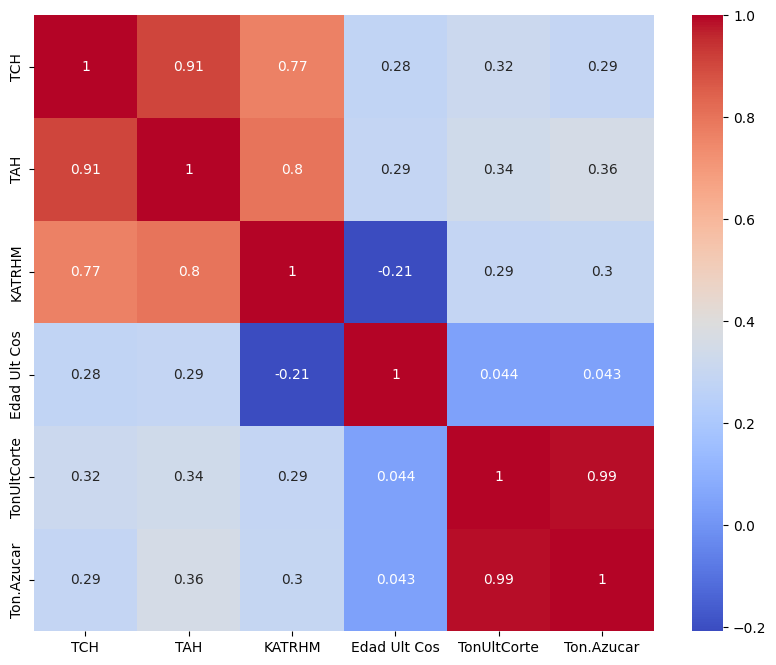

In [517]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_i.corr(), annot=True, cmap='coolwarm')
plt.show()

In [518]:
df_i.describe()

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
count,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000
mean,130.067931,14.019231,1372.453892,13.052686,1152.470284,125.483950
std,32.491140,3.549884,341.453701,1.917297,1020.249033,111.732981
min,3.055379,0.000000,49.089172,5.550000,0.420000,0.000000
25%,109.273480,11.787104,1165.486757,11.960000,407.610000,43.643000
50%,129.803535,14.062295,1383.492899,12.650000,880.310000,94.967000
75%,150.619105,16.334615,1586.077694,13.860000,1605.370000,175.130000
max,301.608000,36.349000,15466.532614,78.190000,13586.140000,1312.973000


Valido nulos en mi dataset de interés

Outliers

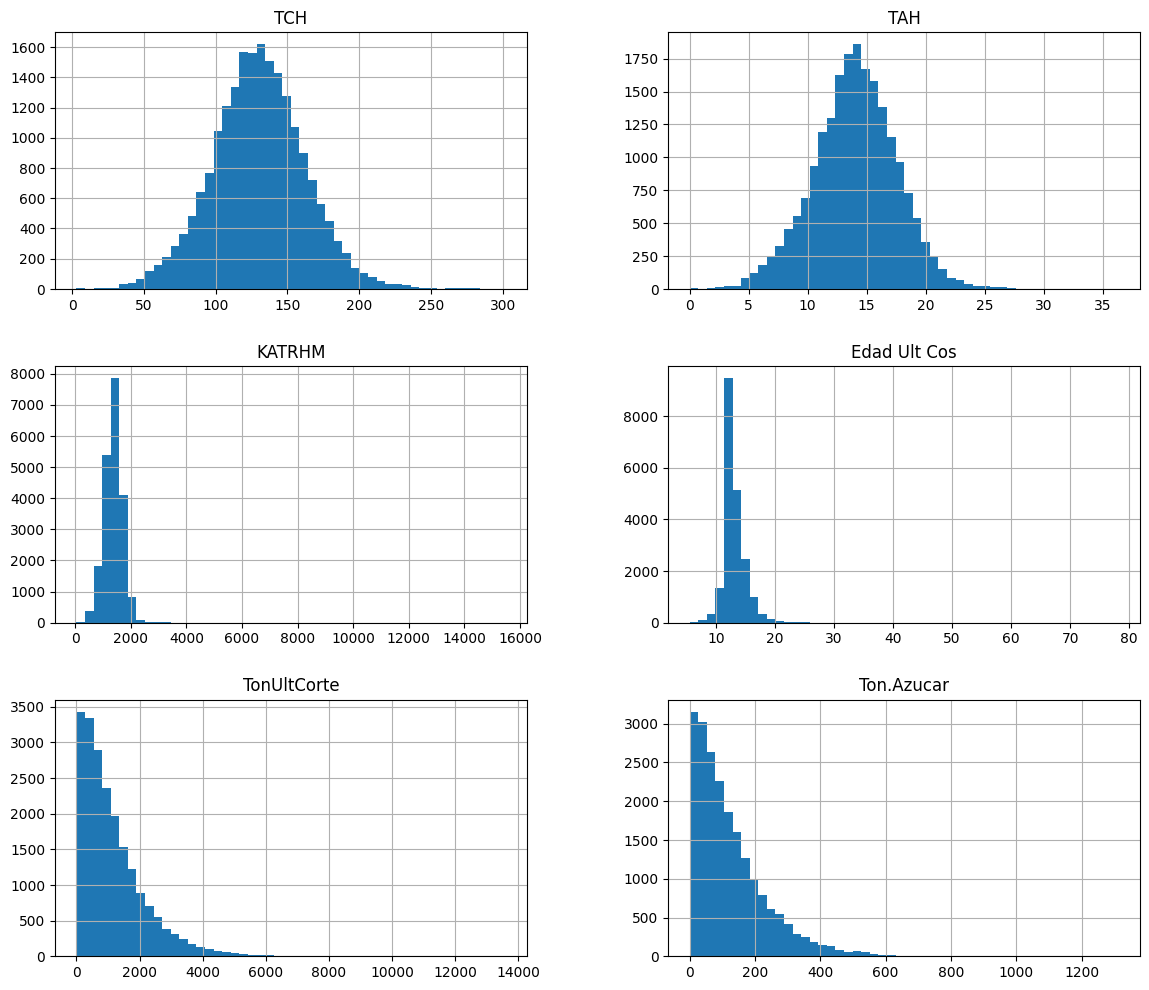

In [519]:
df_i.hist(bins=50,figsize=(14,12))
plt.show()

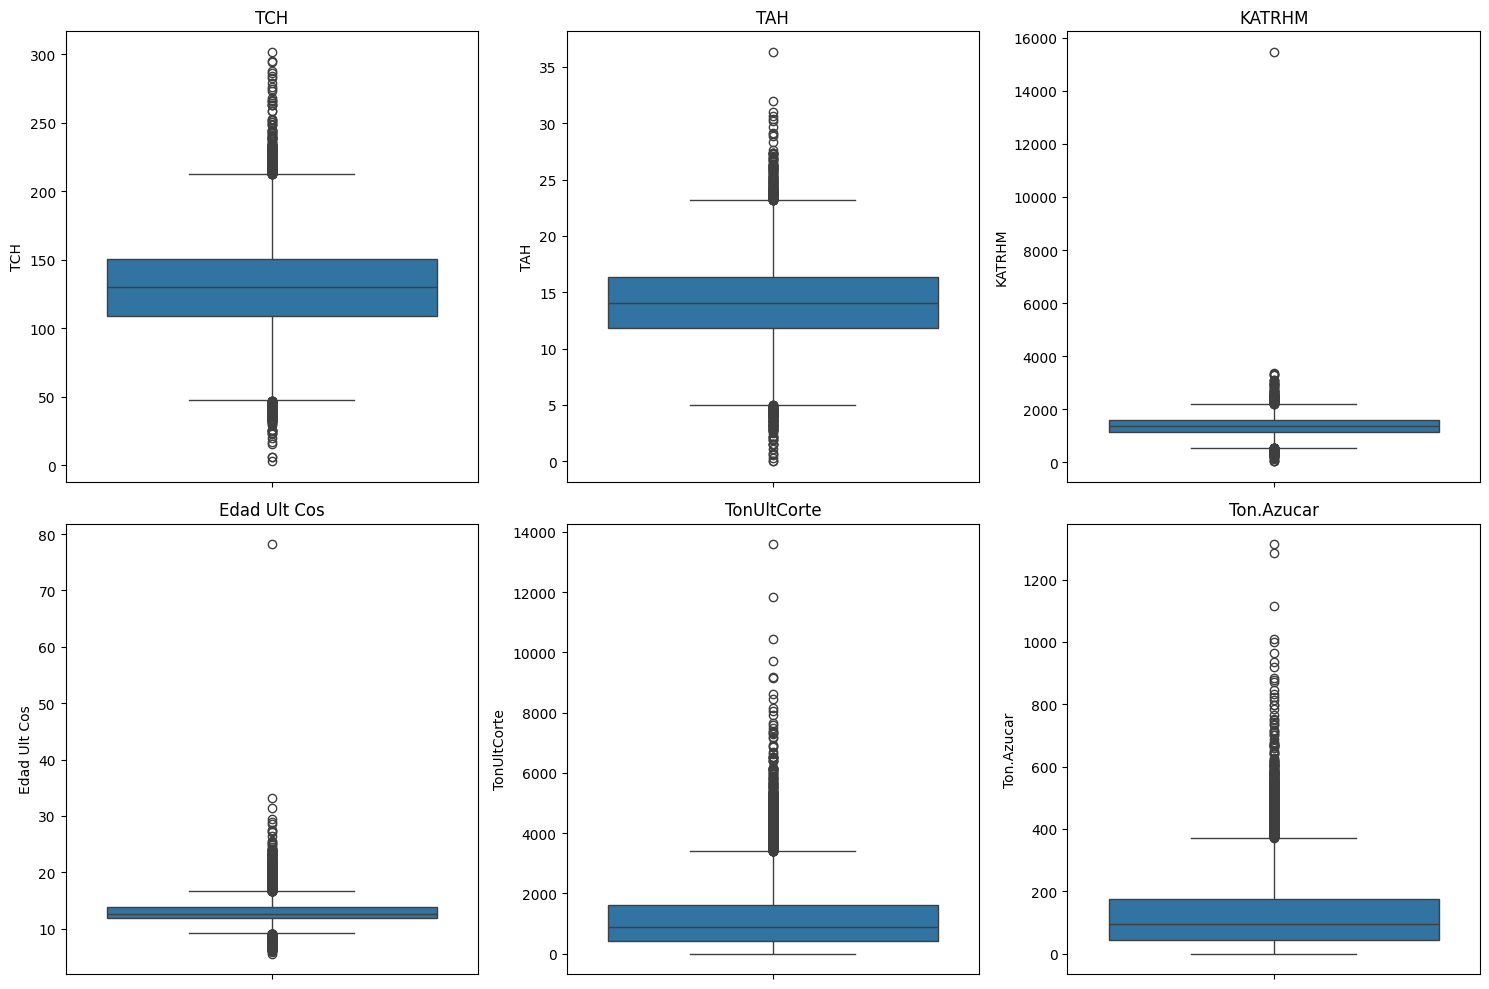

In [520]:
import math

num_cols = df_i.select_dtypes(include=['number']).columns
n = len(num_cols)

# Definir grid
ncols = 3   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_i[col], ax=axes[i])
    axes[i].set_title(col)

# Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

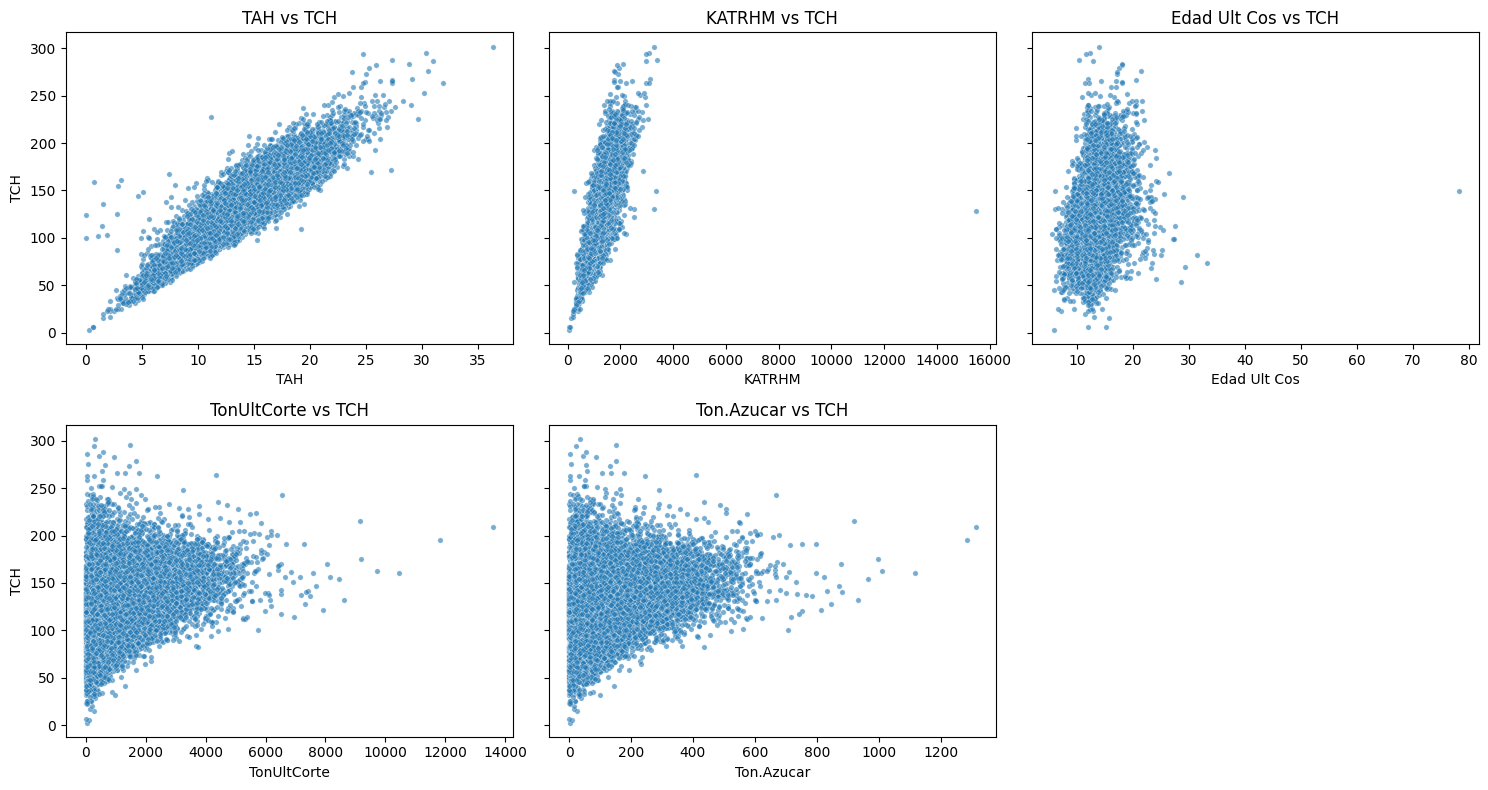

In [521]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

y = "TCH"  # tu variable objetivo en eje Y

# Tomar todas las numéricas excepto Y
x_cols = df_i.select_dtypes(include=['number']).columns.drop(y)

n = len(x_cols)
ncols = 3   # número de gráficos por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_i, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [522]:
df_i.isnull().sum()

,0
TCH,0
TAH,0
KATRHM,0
Edad Ult Cos,0
TonUltCorte,0
Ton.Azucar,0


In [523]:
##Eliminar outliers de Edad ult cos

col = ['TCH', 'TAH', 'KATRHM',  'Edad Ult Cos', 'TonUltCorte','Ton.Azucar']

low = df_i[col].quantile(0.01)   # percent
high = df_i[col].quantile(0.99)   # percent

df_filtered_outliers = df_i[(df_i[col] >= low) & (df_i[col] <= high)].dropna()

In [524]:
df_filtered_outliers

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
0,121.198333,14.341666,1434.823641,12.81,727.190,86.050
1,93.793103,10.157241,1182.180399,11.14,136.000,14.728
2,174.347087,17.629611,1857.192723,12.32,1436.620,145.268
3,136.790476,12.873333,1744.043640,9.79,143.630,13.517
4,113.068432,9.383002,1137.843039,11.53,512.200,42.505
...,...,...,...,...,...,...
20969,88.003731,8.822174,965.660554,11.83,825.475,82.752
20970,89.216708,8.519974,865.891720,12.39,710.165,67.819
20972,98.193181,9.896969,946.516661,13.17,129.615,13.064
20973,181.737639,14.910685,1701.055033,11.76,1139.495,93.490


In [525]:
df_filtered_outliers.isnull().sum()

,0
TCH,0
TAH,0
KATRHM,0
Edad Ult Cos,0
TonUltCorte,0
Ton.Azucar,0


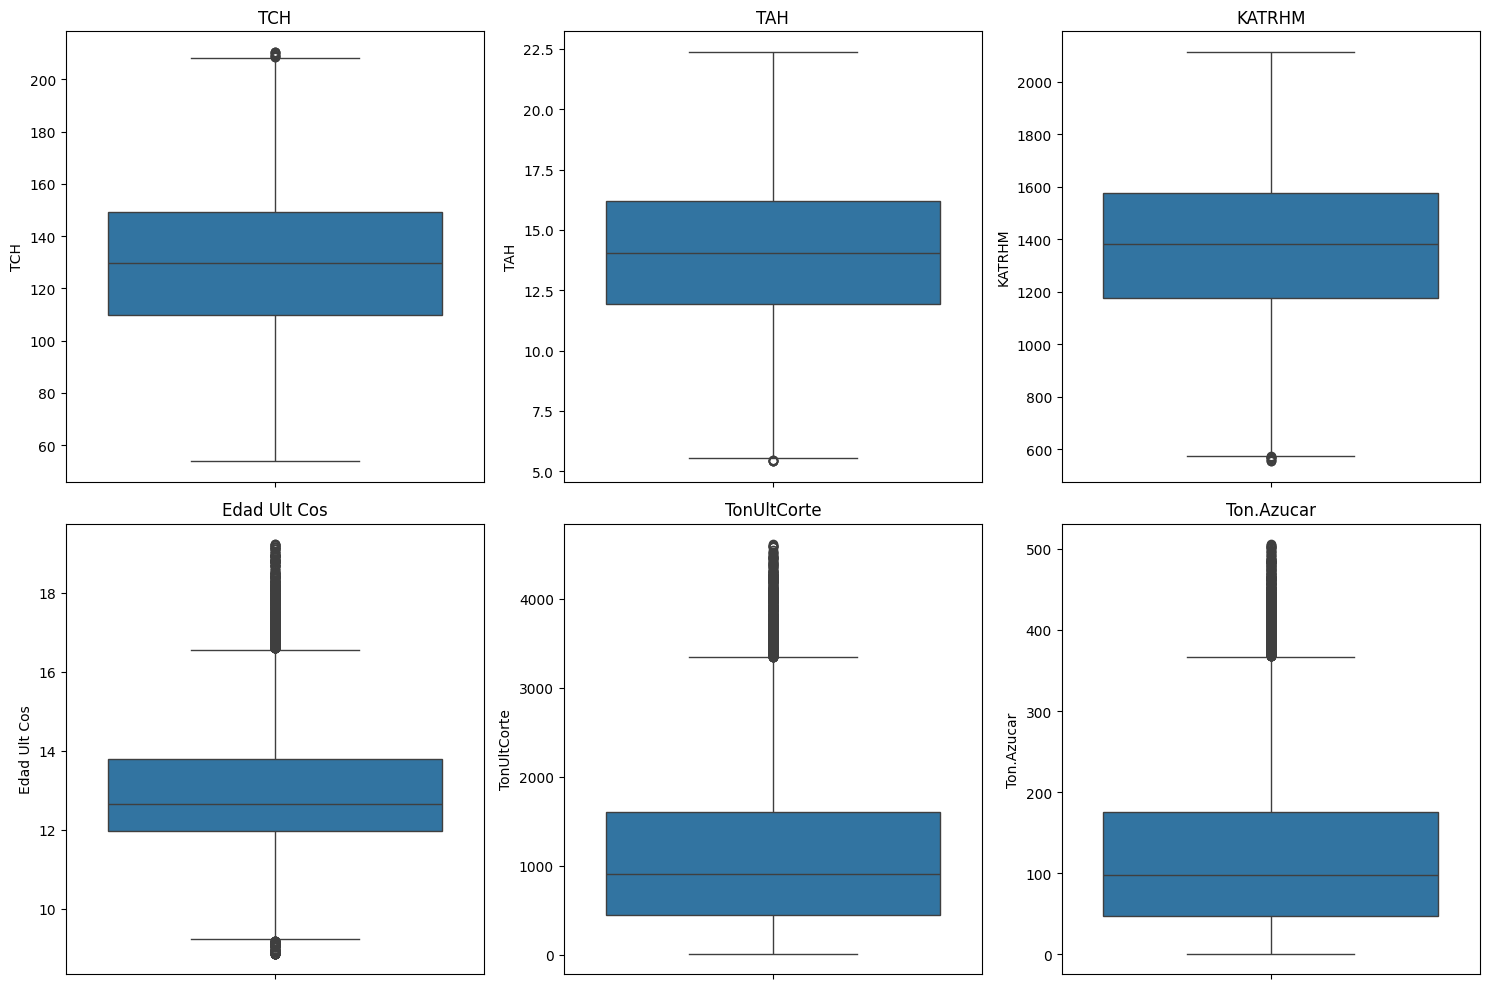

In [526]:
num_cols = df_filtered_outliers.select_dtypes(include=['number']).columns
n = len(num_cols)

# # Definir grid
ncols = 3   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
     sns.boxplot(y=df_filtered_outliers[col], ax=axes[i])
     axes[i].set_title(col)

 # Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

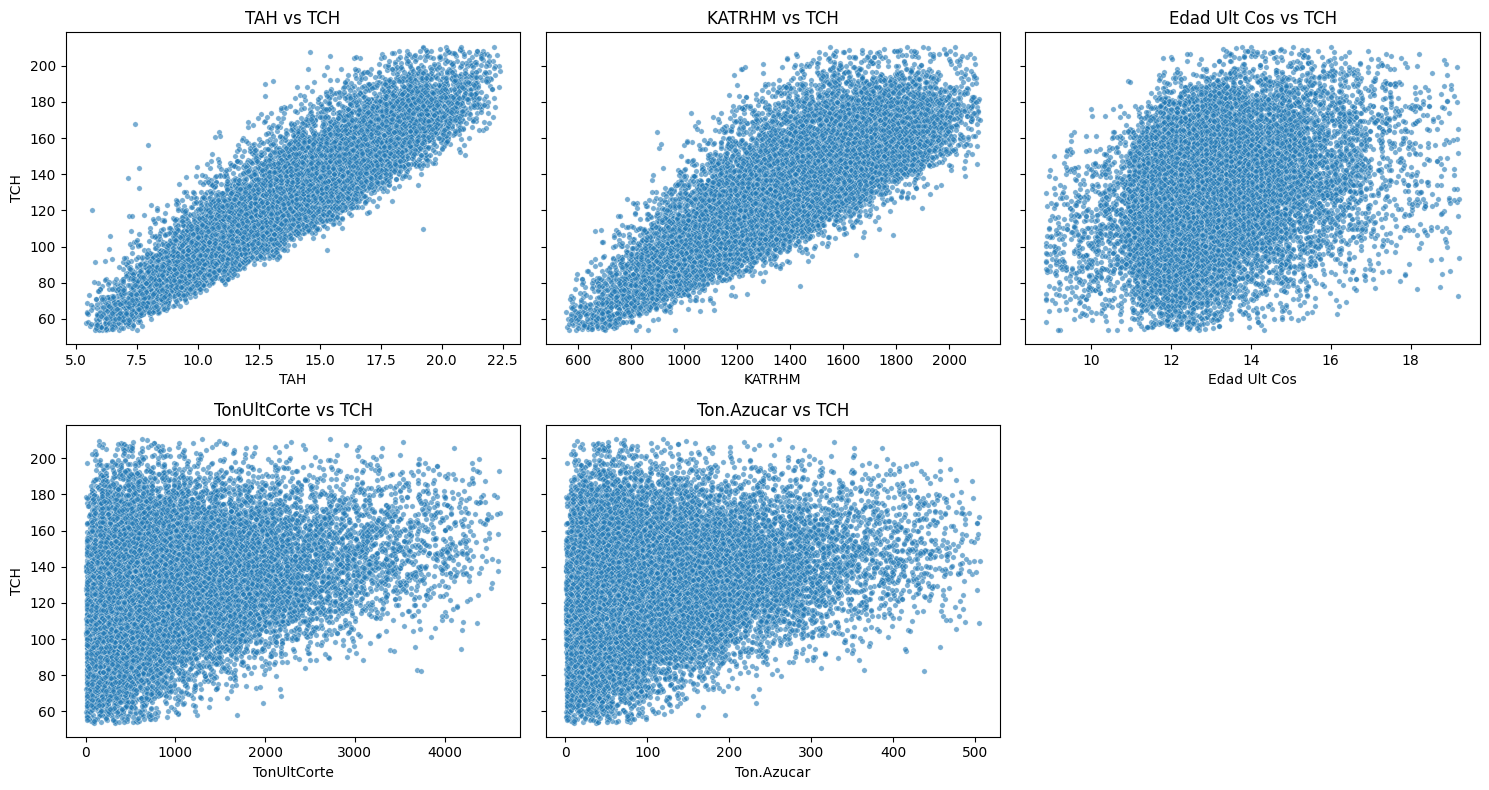

In [628]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

y = "TCH"  # tu variable objetivo en eje Y

# Tomar todas las numéricas excepto Y
x_cols = df_filtered_outliers.select_dtypes(include=['number']).columns.drop(y)

n = len(x_cols)
ncols = 3   # número de gráficos por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_filtered_outliers, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

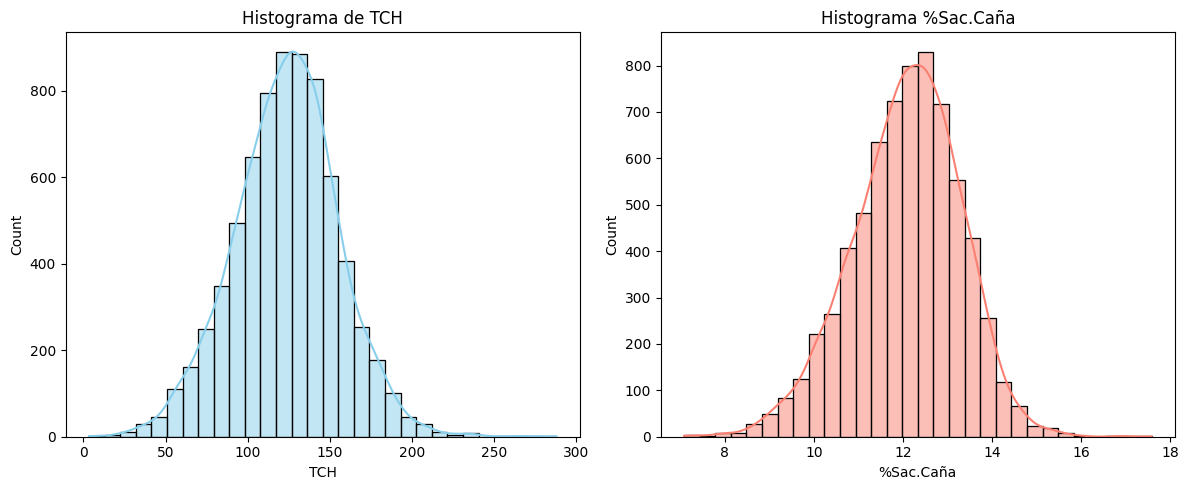

In [317]:
# Crear lienzo con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1
sns.histplot(df['TCH'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de TCH')

# Histograma 2
sns.histplot(df['%Sac.Caña'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histograma %Sac.Caña')

plt.tight_layout()
plt.show()

In [527]:
df_filtered_outliers

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
0,121.198333,14.341666,1434.823641,12.81,727.190,86.050
1,93.793103,10.157241,1182.180399,11.14,136.000,14.728
2,174.347087,17.629611,1857.192723,12.32,1436.620,145.268
3,136.790476,12.873333,1744.043640,9.79,143.630,13.517
4,113.068432,9.383002,1137.843039,11.53,512.200,42.505
...,...,...,...,...,...,...
20969,88.003731,8.822174,965.660554,11.83,825.475,82.752
20970,89.216708,8.519974,865.891720,12.39,710.165,67.819
20972,98.193181,9.896969,946.516661,13.17,129.615,13.064
20973,181.737639,14.910685,1701.055033,11.76,1139.495,93.490


In [572]:
x = df_filtered_outliers['Edad Ult Cos']
y = df_filtered_outliers['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1800.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:27:29   Log-Likelihood:                -90156.
No. Observations:               19030   AIC:                         1.803e+05
Df Residuals:                   19028   BIC:                         1.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.8565      1.680     35.024   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1800.
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:27:29   Log-Likelihood:                -90156.
No. Observations:               19030   AIC:                         1.803e+05
Df Residuals:                   19028   BIC:                         1.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.8565      1.680     35.024      0.000      55.563      62.150
Edad Ult Cos     5.4470      0.128     42.431      0.000       5.195       5.699
==============================================================================
Omnibus:                      117.353   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.625
Skew:                          -0.103   Prob(JB):                     1.72e-21
Kurtosis:                       2.721   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [667]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tu variable independiente es 'Semanas_mad'
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_filtered_outliers[['TAH']])  # estandarizada
y = df_filtered_outliers['TCH']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo = sm.OLS(y, X_scaled).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 7.565e+04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:23:02   Log-Likelihood:                -75749.
No. Observations:               19030   AIC:                         1.515e+05
Df Residuals:                   19028   BIC:                         1.515e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.6527      0.094   1380.388      0.0

In [668]:
modelo = LinearRegression()
modelo.fit(X_scaled, y)

LinearRegression()

In [669]:
y_pred=modelo.predict(X_scaled)

In [670]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y, modelo.predict(X_scaled))
print('Mean Squared Error:', MSE)

Mean Squared Error: 167.86250218163752


In [671]:
rmse= np.sqrt(metrics.mean_squared_error(y, modelo.predict(X_scaled)))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 12.95617621760516


In [578]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, modelo.predict(X_scaled))))

Root Mean Squared Error: 12.95617621760516


Regresión múltiple

In [528]:
df_filtered_outliers

,TCH,TAH,KATRHM,Edad Ult Cos,TonUltCorte,Ton.Azucar
0,121.198333,14.341666,1434.823641,12.81,727.190,86.050
1,93.793103,10.157241,1182.180399,11.14,136.000,14.728
2,174.347087,17.629611,1857.192723,12.32,1436.620,145.268
3,136.790476,12.873333,1744.043640,9.79,143.630,13.517
4,113.068432,9.383002,1137.843039,11.53,512.200,42.505
...,...,...,...,...,...,...
20969,88.003731,8.822174,965.660554,11.83,825.475,82.752
20970,89.216708,8.519974,865.891720,12.39,710.165,67.819
20972,98.193181,9.896969,946.516661,13.17,129.615,13.064
20973,181.737639,14.910685,1701.055033,11.76,1139.495,93.490


In [645]:
# Definir variables predictoras (X) y la variable objetivo (Y)
X = df_filtered_outliers[['TAH',  'Edad Ult Cos']]  # Variables predictoras
y = df_filtered_outliers["TCH"]  # Variable objetivo

In [646]:
### Splitting Dataset ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 42)

In [647]:
## escalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [648]:
# Agregar término de sesgo para regresión lineal
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
# Ajustar modelo de regresión lineal con statsmodels
lin_model = sm.OLS(y_train, X_train_scaled).fit()
y_pred_train = lin_model.predict(X_train_scaled)
y_pred_test = lin_model.predict(X_test_scaled)

In [649]:
MSE_Train= metrics.mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error:', MSE_Train)

Mean Squared Error: 165.2078837111043


In [650]:
mse_Test = metrics.mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse_Test)

Mean Squared Error: 172.88990973178693


In [651]:
rmse_train= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test= np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [652]:
print ("RSME Train:",rmse_train)
print ("RSME Test:",rmse_test)

RSME Train: 12.853321894012625
RSME Test: 13.148760767912195


In [653]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 2.687e+04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:16:19   Log-Likelihood:                -52918.
No. Observations:               13321   AIC:                         1.058e+05
Df Residuals:                   13318   BIC:                         1.059e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.5766      0.111   1163.404      0.000     129.358     129.795
x1            25.6100      0.117    218.772      0.000      25.381      25.839
x2             0.6590      0.117      5.630      0.000       0.430       0.888
==============================================================================
Omnibus:                     1496.089   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2376.102
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       4.295   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aplicamos Lasso y Ridge

In [654]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 13.148312332135433
R²: 0.7948973125395775


In [655]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Ridge= RidgeCV(cv=5)
Ridge.fit(X_train_scaled, y_train)

y_pred_Ridge = Ridge.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_Ridge))
r2 = r2_score(y_test, y_pred_Ridge)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 13.148739125071968
R²: 0.794883997096991


Modelo Polinomial

In [656]:
X_poly = np.column_stack((df_filtered_outliers["TAH"], df_filtered_outliers["Edad Ult Cos"]**2,df_filtered_outliers["TonUltCorte"]))
X_poly = sm.add_constant(X_poly)  # Agregar término de sesgo
# Ajustar modelo de regresión polinómica con statsmodels
poly_model1 = sm.OLS(df_filtered_outliers["TCH"], X_poly).fit()
y_pred_poly_sm1 = poly_model1.predict(X_poly)

In [657]:
print(poly_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 2.535e+04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:16:32   Log-Likelihood:                -75709.
No. Observations:               19030   AIC:                         1.514e+05
Df Residuals:                   19026   BIC:                         1.515e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7862      0.504     23.370      0.0

Validación supuesto

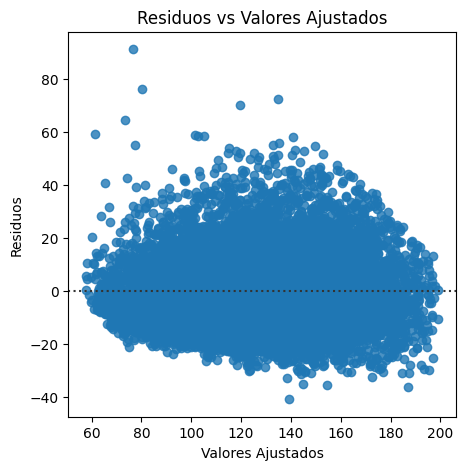

In [673]:
### Linealidad

# Gráficos de diagnóstico
residuals = lin_model.resid
fitted = lin_model.fittedvalues
# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(5, 5))
sns.residplot(x=fitted, y=residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()


In [674]:
## Independencia de errores
# Cálculo del estadístico de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')

Estadístico de Durbin-Watson: 2.00


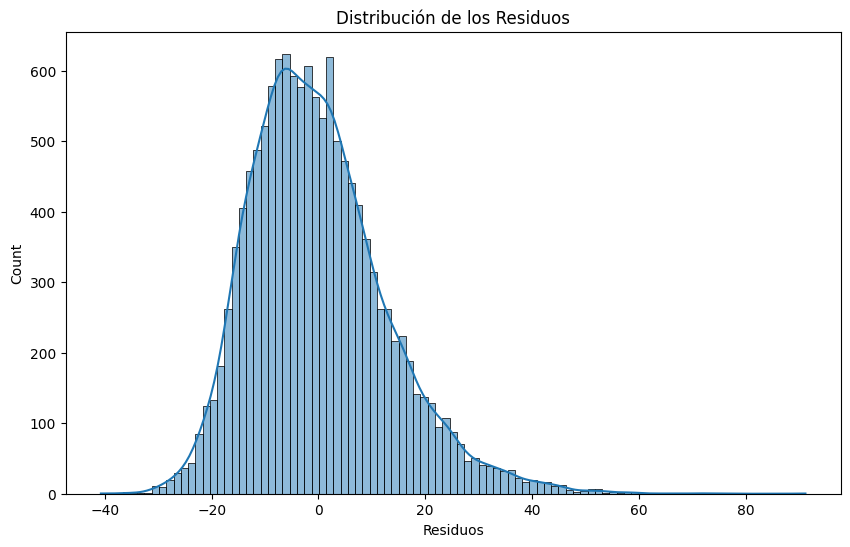

In [675]:
# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()

In [676]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

gq = het_goldfeldquandt(residuals, X_train_scaled, alternative='two-sided', drop=0.2)
# devuelve (F stat, p-value, punto de corte). p < 0.05 ⇒ HAY heterocedasticidad
print({"F": gq[0], "p-value": gq[1], "split": gq[2]})

{'F': np.float64(1.0169929856351974), 'p-value': np.float64(0.5498071767613263), 'split': 'two-sided'}


In [677]:
w = het_white(residuals, X_train_scaled)  # (LM stat, LM p, F stat, F p)
print({"LM": w[0], "LM p-value": w[1], "F": w[2], "F p-value": w[3]})
# p < 0.05 ⇒ HAY heterocedasticidad

{'LM': np.float64(63.362395235430036), 'LM p-value': np.float64(2.4490204699883694e-12), 'F': np.float64(12.727309611428103), 'F p-value': np.float64(2.302057305999725e-12)}
